# Homework_3_2024

### Import libraries and data

In [2]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
data_Q1 = pd.read_csv('data_Q1.csv')
data_Q2 = pd.read_csv('data_Q2.csv')

In [4]:
data_Q1.drop_duplicates(inplace=True)
data_Q1.dropna(inplace=True)
data_Q1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Q1-1. Do an initial exploratory of the data (using the describe method) and answer the following questions:**

a. What is the mean of the annual income?

    The mean of annual income is 60.56
b. What is the max value of the Age?

    The max value of age is 70
c. What is the range of Spending Score?

    The range of Spending Score is 99 - 1 = 98

In [5]:
# Insert your code here for Q1-1.
# Insert your code here for Q1-1.
annualIncome = data_Q1['Annual Income (k$)']
print(annualIncome.describe())
print()
age = data_Q1['Age']
print(age.describe())
print()
spendingScore = data_Q1['Spending Score (1-100)']
print(spendingScore.describe())


count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


**Q1-2. There are three dimensions (Age, Annual Income, Spending Score) that could be used in K-Means Clustering, select two of them and show all possible cases(in total 3).**

a. Using plt.scatter to plot the data, based on the plot decide the appropriate K value by yourself.

b. Perform a K-Means Clustering on data using "Kmeans". 

c. Print out the results by plotting the data colored by their labels and plot the cluster centers as determined by the K-Means estimator.

**Scenario 1: Age, Annual Income**

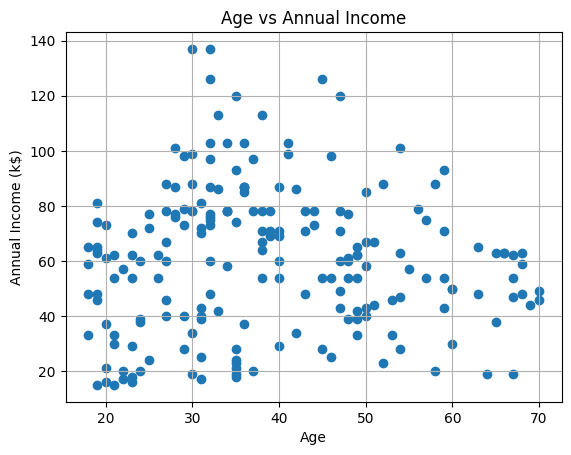

In [6]:
# Insert your code here for Q1-2 Scenario 1.
# Insert your code here for Q1-2 Scenario 1.
plt.scatter(age,annualIncome)
plt.title('Age vs Annual Income')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.grid(True)
plt.show()


**Scenario 2: Age, Spending Score**

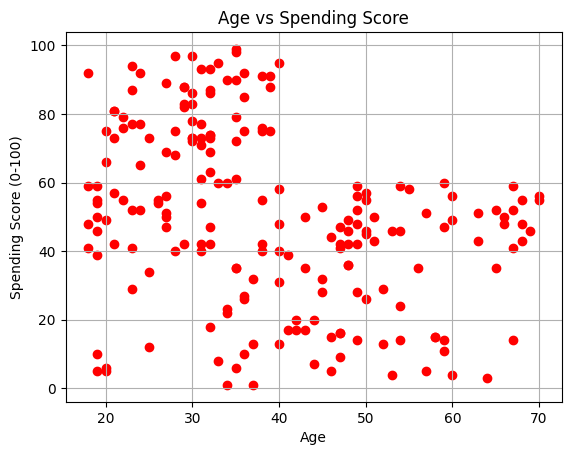

In [7]:
# Insert your code here for Q1-2 Scenario 2.
# Insert your code here for Q1-2 Scenario 2.
plt.scatter(age,spendingScore, c='red')
plt.title('Age vs Spending Score')
plt.ylabel('Spending Score (0-100)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

**Scenario 3: Annual Income, Spending Score**

C:\Users\iceki\AppData\Local\Temp\ipykernel_5312\2318247685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustersData['Cluster'] = kmeans.fit_predict(clustersData)


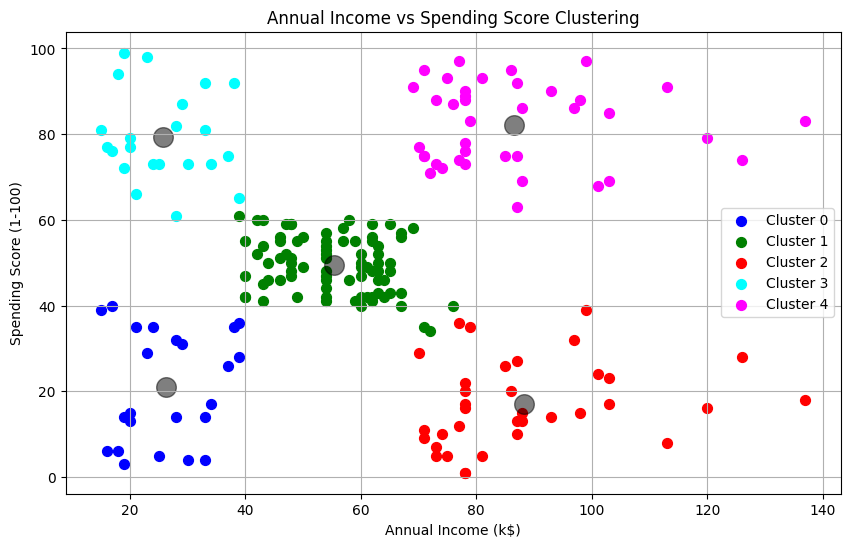

In [41]:
# Insert your code here for Q1-2 Scenario 3.``

clustersData = data_Q1[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5)
clustersData['Cluster'] = kmeans.fit_predict(clustersData)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(clustersData[clustersData['Cluster'] == i]['Annual Income (k$)'],
                clustersData[clustersData['Cluster'] == i]['Spending Score (1-100)'],
                s=50, c=colors[i], label=f'Cluster {i}')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Annual Income vs Spending Score Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend()
plt.show()

**Q2. Here is a dataset that can be clustered into different clusters. Try different K values(MAX 7) and finds out which K value is the best for this dataset.**

In [9]:
data_Q2

,0,1
0,3.790576,-0.091328
1,0.208590,0.428525
2,-2.133866,0.114616
3,-2.369302,0.146900
4,1.068705,-0.009686
...,...,...
395,1.171324,1.016103
396,4.706794,0.895397
397,-2.373985,0.120901
398,-2.187685,1.201192


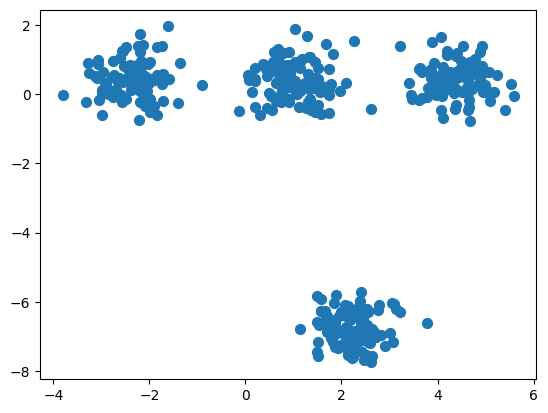

In [10]:
X2 = data_Q2.values
plt.scatter(X2[:,0], X2[:,1],s=50)

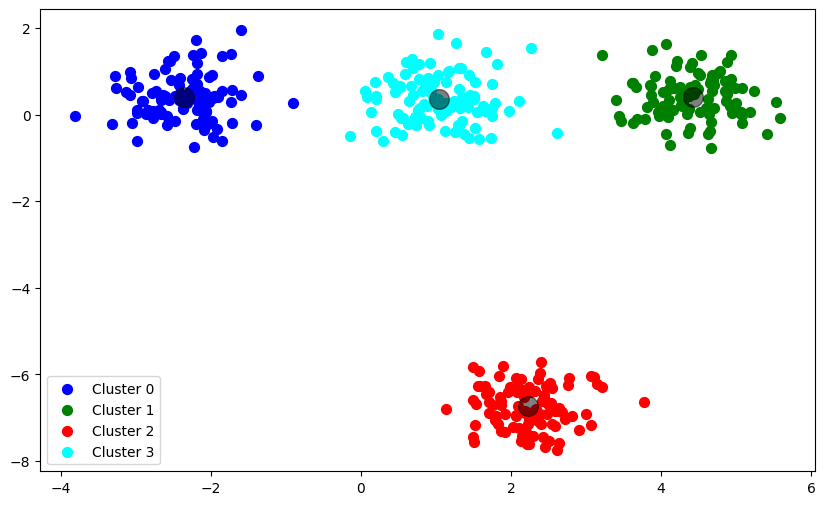

In [11]:
# Insert your code here for Q2.


clustersData = data_Q2[['0', '1']]
kmeans = KMeans(n_clusters=4)
clustersData['Cluster'] = kmeans.fit_predict(clustersData)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'cyan']

for i in range(4):
    plt.scatter(clustersData[clustersData['Cluster'] == i]['0'],
                clustersData[clustersData['Cluster'] == i]['1'],
                s=50, c=colors[i], label=f'Cluster {i}')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.legend()
plt.show()